In [7]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import cv2

In [2]:
def load_microwave_volume(input_file):
        """
        Load microwave volume from tiff file. Each provided volume contains three slices in propagation direction. The
        provided microwave volumes are given in linear scale.

        :param string input_file: Path to tiff file
        :return ndarray: Image as ndarray with shape MxNx3
        """

        return skimage.io.imread(input_file)


In [3]:
def visualize_microwave_volume(input_file, dynamic_range=25, label=None):
        """
        Visualize the slices of a microwave image volume in logarithmic scale with the given dynamic_range
        :param string input_file: Path to input file
        :param float dynamic_range: Dynamic range in dB (default: 25)
        """

        img = load_microwave_volume(input_file)

        if label is None:
            label_filename = input_file.replace('.tiff', '.json')
            if os.path.exists(label_filename):
                with open(label_filename, 'r') as file:
                    label = json.loads(file.read())

        fig, axs = plt.subplots(1, 3, figsize=(16, 7))
        for i in range(img.shape[2]):
            volume = 8 * np.log10(img[:, :, i])
            max_val = np.max(volume)
            axs[i].imshow(volume, vmax=max_val, vmin=max_val - dynamic_range)
            axs[i].set_title(f"Slice {i + 1:d}")

            if label is not None:
                x_coords = [coord[0] for coord in label['coordinates']['present']]
                y_coords = [257-coord[1] for coord in label['coordinates']['present']]
                axs[i].scatter(x_coords, y_coords, color='white')

                x_coords = [coord[0] for coord in label['coordinates']['missing']]
                y_coords = [257 - coord[1] for coord in label['coordinates']['missing']]
                axs[i].scatter(x_coords, y_coords, color='red')

        if label is not None:
            fig.canvas.set_window_title(f"Present pills: {len(label['coordinates']['present'])}, "
                                        f"Missing pills: {len(label['coordinates']['missing'])}")

        plt.show()

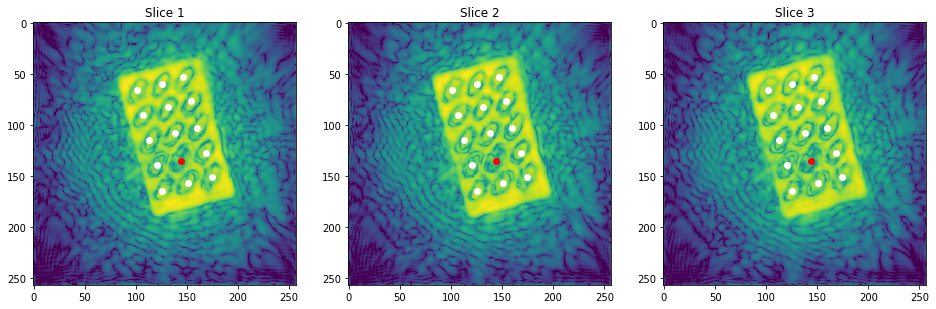

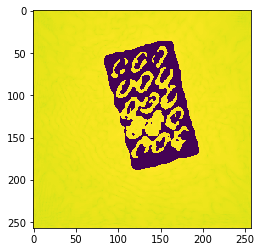

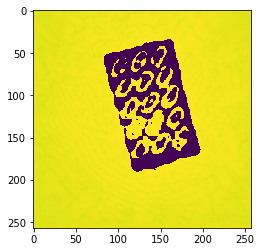

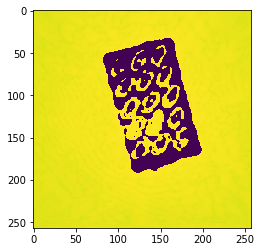

In [4]:
tiff_path = os.path.join('public_data', '4098daacdac3dd6f825508f36cc015f2.tiff')
visualize_microwave_volume(tiff_path)

img = skimage.io.imread(tiff_path)
dynamic_range = 25
rgbArray1 = np.full((257,257,3),0, 'uint8')
#fig, axs = plt.subplots(1, 3, figsize=(16, 7))
for i in range(img.shape[2]):
    rgbArray1[..., i] = 5 *np.log10(img[:, :, i])
    max_val = np.max(rgbArray1[..., i])
    #axs[i].imshow(volume, vmax=max_val, vmin=max_val - dynamic_range)
    #rgbArray1[..., i] = volume.copy()
    #max_val = np.max(volume)
    #axs[i].imshow(volume, vmax=max_val, vmin=max_val - dynamic_range)
#     axs[i].imshow(volume)
#     axs[i].set_title(f"Slice {i + 1:d}")


plt.imshow(rgbArray1[:,:,0])
plt.show()
plt.imshow(rgbArray1[:,:,1])
plt.show()
plt.imshow(rgbArray1[:,:,2])

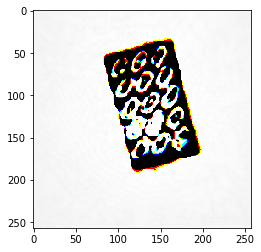

In [103]:
plt.imshow(rgbArray1)

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(rgbArray1.reshape(-1, 3))
res = kmeans.labels_.reshape(257, 257, -1)

In [1]:
plt.imshow(res.reshape(257,257), cmap = 'gray')

NameError: name 'plt' is not defined

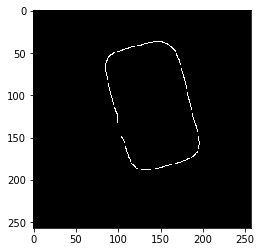

In [5]:
from skimage import feature
from skimage.feature import corner_harris, corner_subpix, corner_peaks

edges1 = feature.canny(rgbArray1[:,:,0], sigma = 12)

#plt.imshow(res)
plt.imshow(-edges1.astype('u1'), cmap = 'gray')

coords = corner_peaks(corner_harris(edges1), min_distance=30, threshold_rel=0.5)

coords[:,[0, 1]] = coords[:,[1, 0]]

In [8]:
rect = cv2.minAreaRect(coords)
box = cv2.boxPoints(rect)
box = np.int0(box)

top_left_x = min(box[:,1])
top_left_y = min(box[:,0])
bot_right_x = max(box[:,1])
bot_right_y = max(box[:,0])

rect = cv2.minAreaRect(coords)
box = cv2.boxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
box = np.int0(box)
cv2.drawContours(rgbArray1,[box],0,(0,0,255),2)
cv2.imshow("", rgbArray1)

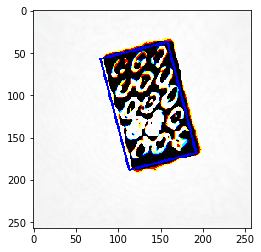

In [9]:
plt.imshow(rgbArray1)

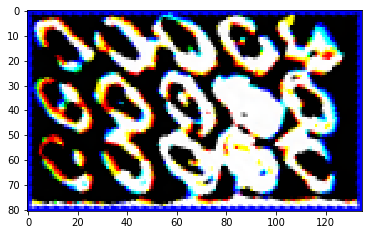

In [10]:
width = int(rect[1][0])
height = int(rect[1][1])

src_pts = box.astype("float32")
# coordinate of the points in box points after the rectangle has been
# straightened
dst_pts = np.array([[0, height-1],
                    [0, 0],
                    [width-1, 0],
                    [width-1, height-1]], dtype="float32")

# the perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# directly warp the rotated rectangle to get the straightened rectangle
warped = cv2.warpPerspective(rgbArray1, M, (width, height))

cv2.imwrite("crop_img.jpg", warped)

plt.imshow(warped)

(array([1510.,   56.,   33.,   27.,   36.,   32.,   44.,   42.,   40.,
         367.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

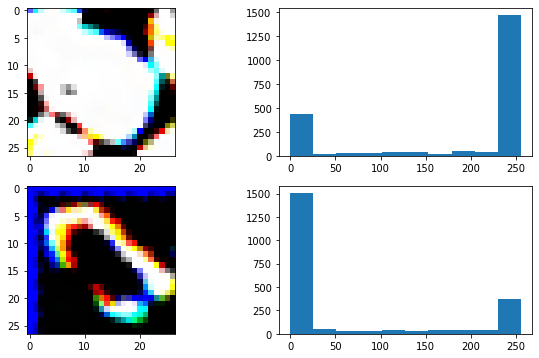

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.imshow(warped[27:54,80:107], cmap = 'gray')
plt.subplot(2,2,2)
plt.hist(warped[27:54,80:107].flatten())

plt.subplot(2,2,3)
plt.imshow(warped[0:27,0:27], cmap = 'gray')
plt.subplot(2,2,4)
plt.hist(warped[0:27,0:27].flatten())

# DO NOT CONSIDER any CODE below this cell :) 

In [18]:
type(edges1[0,0])

numpy.bool_

In [17]:
-edges1.astype('u1')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [194]:
coords = corner_peaks(corner_harris(edges1), min_distance=30, threshold_rel=0.5)

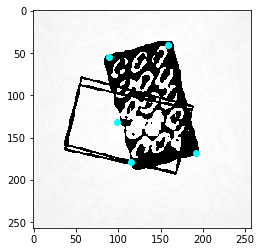

In [195]:
fig, ax = plt.subplots()
ax.imshow(rgbArray1[:,:,0], cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)

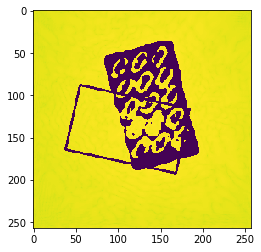

In [178]:
plt.imshow(rgbArray1[:,:,0])

In [198]:
coords

array([[159,  40],
       [ 89,  55],
       [ 99, 132],
       [192, 168],
       [115, 179]], dtype=int64)

In [197]:
coords[:,[0, 1]] = coords[:,[1, 0]]

In [170]:
 coords

array([[ 40, 159],
       [ 55,  89],
       [132,  99],
       [168, 192],
       [179, 115]], dtype=int64)

In [157]:
top_left_x = min(coords[:,0])
top_left_y = min(coords[:,1])
bot_right_x = max(coords[:,0])
bot_right_y = max(coords[:,1])

In [145]:
import cv2
print("shape of cnt: {}".format(coords.shape))
rect = cv2.minAreaRect(coords)
print("rect: {}".format(rect))


shape of cnt: (4, 2)
rect: ((111.55853271484375, 140.22683715820312), (132.0731658935547, 77.5956039428711), 12.094757080078125)


In [167]:
rect = cv2.minAreaRect(coords)
box = cv2.boxPoints(rect)
box = np.int0(box)

top_left_x = min(box[:,1])
top_left_y = min(box[:,0])
bot_right_x = max(box[:,1])
bot_right_y = max(box[:,0])

rect = cv2.minAreaRect(coords)
box = cv2.boxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
box = np.int0(box)
cv2.drawContours(rgbArray1,[box],0,(0,0,255),2)
cv2.imshow("", rgbArray1)

In [173]:
box = np.array([[158, 37],
       [79, 57],
       [113, 188],
       [192, 168]])

array([[[248, 247, 247],
        [247, 246, 245],
        [246, 245, 244],
        ...,
        [244, 244, 244],
        [245, 246, 246],
        [247, 247, 247]],

       [[247, 247, 246],
        [247, 247, 246],
        [245, 245, 245],
        ...,
        [244, 244, 244],
        [244, 245, 246],
        [247, 246, 246]],

       [[246, 245, 245],
        [245, 245, 244],
        [245, 244, 243],
        ...,
        [244, 244, 245],
        [240, 243, 245],
        [245, 244, 245]],

       ...,

       [[246, 246, 246],
        [245, 246, 246],
        [244, 245, 245],
        ...,
        [243, 244, 245],
        [245, 245, 245],
        [246, 246, 246]],

       [[245, 246, 247],
        [244, 246, 247],
        [244, 245, 245],
        ...,
        [245, 244, 244],
        [245, 245, 245],
        [245, 246, 246]],

       [[247, 246, 247],
        [246, 245, 246],
        [245, 243, 243],
        ...,
        [245, 244, 243],
        [246, 246, 246],
        [246, 246, 247]]

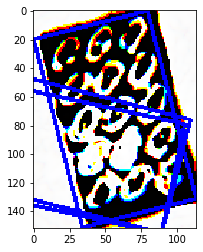

In [201]:
plt.imshow(rgbArray1[top_left_x:bot_right_x+1, top_left_y:bot_right_y+1])

In [203]:
width = int(rect[1][0])
height = int(rect[1][1])

src_pts = box.astype("float32")
# coordinate of the points in box points after the rectangle has been
# straightened
dst_pts = np.array([[0, height-1],
                    [0, 0],
                    [width-1, 0],
                    [width-1, height-1]], dtype="float32")

# the perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# directly warp the rotated rectangle to get the straightened rectangle
warped = cv2.warpPerspective(rgbArray1, M, (width, height))

cv2.imwrite("crop_img.jpg", warped)

plt.imshow(warped)

True

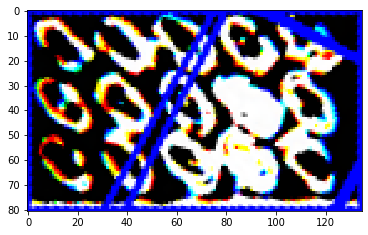

In [207]:
warped.shape

(81, 135, 3)

In [208]:
135/5

27.0

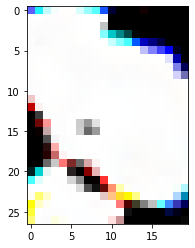

(array([ 260.,   15.,   18.,   15.,   25.,   27.,   13.,   34.,   28.,
        1185.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

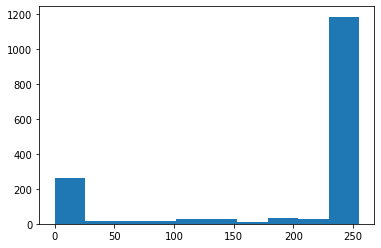

In [12]:
plt.imshow(warped[27:54,80:100], cmap = 'gray')
plt.show()
plt.hist(warped[27:54,80:100].flatten())

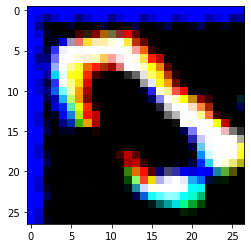

(array([1510.,   56.,   33.,   27.,   36.,   32.,   44.,   42.,   40.,
         367.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

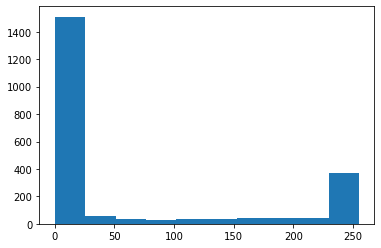

In [13]:
plt.imshow(warped[0:27,0:27], cmap = 'gray')
plt.show()
plt.hist(warped[0:27,0:27].flatten())

In [160]:
box = cv2.boxPoints(rect)
box = np.int0(box)

print("bounding box: {}".format(box))
cv2.drawContours(rgbArray1, [box], 0, (0, 0, 255), 2)

bounding box: [[ 38 164]
 [ 55  88]
 [184 116]
 [168 192]]


array([[[248, 247, 247],
        [247, 246, 245],
        [246, 245, 244],
        ...,
        [244, 244, 244],
        [245, 246, 246],
        [247, 247, 247]],

       [[247, 247, 246],
        [247, 247, 246],
        [245, 245, 245],
        ...,
        [244, 244, 244],
        [244, 245, 246],
        [247, 246, 246]],

       [[246, 245, 245],
        [245, 245, 244],
        [245, 244, 243],
        ...,
        [244, 244, 245],
        [240, 243, 245],
        [245, 244, 245]],

       ...,

       [[246, 246, 246],
        [245, 246, 246],
        [244, 245, 245],
        ...,
        [243, 244, 245],
        [245, 245, 245],
        [246, 246, 246]],

       [[245, 246, 247],
        [244, 246, 247],
        [244, 245, 245],
        ...,
        [245, 244, 244],
        [245, 245, 245],
        [245, 246, 246]],

       [[247, 246, 247],
        [246, 245, 246],
        [245, 243, 243],
        ...,
        [245, 244, 243],
        [246, 246, 246],
        [246, 246, 247]]

In [138]:
width = int(rect[1][1])
height = int(rect[1][0])

src_pts = box.astype("float32")
# coordinate of the points in box points after the rectangle has been
# straightened
dst_pts = np.array([[0, height-1],
                    [0, 0],
                    [width-1, 0],
                    [width-1, height-1]], dtype="float32")

# the perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# directly warp the rotated rectangle to get the straightened rectangle
warped = cv2.warpPerspective(img, M, (width, height))

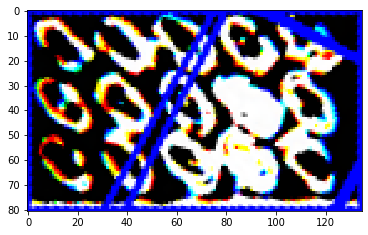

In [217]:
plt.imshow(warped)